<a href="https://colab.research.google.com/github/EkCaAv/IBERO/blob/EkCaAv-IA-5/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
#import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/PY-Diplomado/train_distance_matrix.csv',sep=',')


In [5]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'gc_distance', 'trip_duration', 'google_distance', 'google_duration'],
      dtype='object')

In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
gc_distance           float64
trip_duration           int64
google_distance       float64
google_duration       float64
dtype: object

In [7]:
import datetime as dt
import warnings
warnings.simplefilter('ignore')

In [8]:
data.sample(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,gc_distance,trip_duration,google_distance,google_duration
35226,id3509858,1,1/8/2016 8:16,1/8/2016 8:30,1,-73.964821,40.791607,-73.982628,40.761585,N,2.274571,841,5152.0,1211.0
4184,id2183215,1,1/1/2016 19:02,1/1/2016 19:08,3,-73.994347,40.761089,-73.984978,40.779198,N,1.344164,354,2416.0,478.0


# Duración del viaje

In [9]:
data.isnull().sum()

id                      0
vendor_id               0
pickup_datetime         0
dropoff_datetime        0
passenger_count         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
store_and_fwd_flag      0
gc_distance             0
trip_duration           0
google_distance       559
google_duration       559
dtype: int64

In [10]:
data.nunique()

id                    39396
vendor_id                 2
pickup_datetime        9934
dropoff_datetime       9949
passenger_count           8
pickup_longitude      10386
pickup_latitude       18345
dropoff_longitude     11765
dropoff_latitude      20248
store_and_fwd_flag        2
gc_distance           39228
trip_duration          2941
google_distance       11985
google_duration        2703
dtype: int64

In [11]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,gc_distance,trip_duration,google_distance,google_duration
count,39396.000000,39396.000000,39396.000000,39396.000000,39396.000000,39396.000000,39396.000000,3.939600e+04,38837.000000,38837.000000
mean,1.540512,1.691669,-73.971934,40.750858,-73.973048,40.752142,2.166888,9.745813e+02,4937.839097,821.085614
std,0.498362,1.332440,0.041576,0.040643,0.045388,0.032743,3.769393,1.524926e+04,6184.438363,509.541421
min,1.000000,0.000000,-74.345078,35.081532,-79.352837,40.436329,0.000000,2.000000e+00,0.000000,0.000000
25%,1.000000,1.000000,-73.991318,40.737885,-73.990822,40.736804,0.753846,3.590000e+02,1639.000000,453.000000
50%,2.000000,1.000000,-73.981133,40.754929,-73.979263,40.755201,1.281959,5.890000e+02,2733.000000,702.000000
75%,2.000000,2.000000,-73.966316,40.768787,-73.962667,40.770051,2.377999,9.490000e+02,5174.000000,1073.000000
max,2.000000,8.000000,-71.799896,41.023983,-73.324074,41.334740,553.930793,2.227612e+06,91060.000000,4164.000000


# Tratamiento de la data

In [12]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [13]:
data.sample(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,gc_distance,trip_duration,google_distance,google_duration
14986,id1008684,1,2016-01-04 07:23:00,2016-01-04 07:32:00,1,-73.99427,40.750984,-73.974625,40.750813,N,1.028652,520,2281.0,741.0
23237,id0139686,1,2016-01-05 23:23:00,2016-01-05 23:29:00,4,-73.98275,40.772137,-73.985825,40.758739,N,0.939803,399,1907.0,523.0


In [14]:
data.shape

(39396, 14)

In [15]:
data['pickup_datetime'].dtypes

dtype('<M8[ns]')

In [16]:
data['pickup_day'] = data['pickup_datetime'].dt.day_name()
data['dropoff_day'] = data['dropoff_datetime'].dt.day_name()

In [17]:
data['pickup_day_no'] = data['pickup_datetime'].dt.weekday
data['droff_day_no'] = data['dropoff_datetime'].dt.weekday

In [18]:
data.shape

(39396, 18)

In [19]:
data.sample()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,gc_distance,trip_duration,google_distance,google_duration,pickup_day,dropoff_day,pickup_day_no,droff_day_no
30941,id2165619,1,2016-01-07 13:50:00,2016-01-07 14:01:00,1,-73.970444,40.783997,-73.980476,40.765053,N,1.41063,690,3090.0,768.0,Thursday,Thursday,3,3


In [20]:
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour

data['pickup_month'] = data['pickup_datetime'].dt.month
data['dropoff_month'] = data['pickup_datetime'].dt.month

In [21]:
data.sample(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,google_distance,google_duration,pickup_day,dropoff_day,pickup_day_no,droff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
32743,id2934884,2,2016-01-07 19:32:00,2016-01-07 19:40:00,1,-73.986389,40.756615,-73.999794,40.761631,N,...,1334.0,398.0,Thursday,Thursday,3,3,19,19,1,1
18509,id1630762,1,2016-01-04 20:33:00,2016-01-04 20:55:00,1,-73.985954,40.746376,-73.968918,40.677883,N,...,12750.0,1749.0,Monday,Monday,0,0,20,20,1,1


In [22]:
def time_of_day(x):
    if x in range(6,12):
        return 'morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,20):
        return 'Evening'
    else:
        return 'Night'
    

In [23]:
data['pickup_timeofday'] = data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday'] = data['dropoff_hour'].apply(time_of_day)

In [24]:
data.sample(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,droff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
39272,id1583886,1,2016-01-08 21:33:00,2016-01-08 21:55:00,1,-73.873215,40.774036,-73.996353,40.742851,N,...,Friday,Friday,4,4,21,21,1,1,Night,Night
7383,id0074701,1,2016-01-02 15:17:00,2016-01-02 15:34:00,2,-74.011269,40.713402,-73.995949,40.722000,N,...,Saturday,Saturday,5,5,15,15,1,1,Afternoon,Afternoon


In [25]:
from geopy.distance import great_circle

In [26]:
def cal_distance(pickup_lat , pickup_long , dropoff_lat, dropoff_long):
    start_coordinates = (pickup_lat, pickup_long)
    stop_coordinates = (dropoff_lat, dropoff_long)
    
    return great_circle(start_coordinates, stop_coordinates).km
    

In [27]:
data['distance'] = data.apply(lambda x : cal_distance(x['pickup_latitude'],x['pickup_longitude'], x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [28]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [29]:
data.sample(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,droff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
1016,id2252563,1,2016-01-01 02:34:00,2016-01-01 02:52:00,1,-74.002464,40.750168,-73.949646,40.781734,N,...,Friday,4,4,2,2,1,1,Night,Night,5.666310
23191,id0044327,1,2016-01-05 23:09:00,2016-01-05 23:16:00,1,-73.988762,40.739609,-73.973404,40.738251,N,...,Tuesday,1,1,23,23,1,1,Night,Night,1.302714


# Análisis de variables

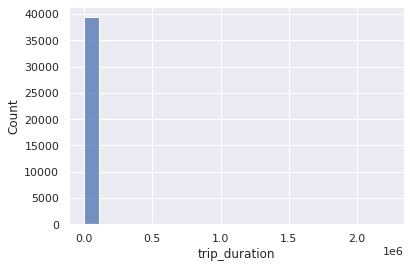

In [30]:
sns.histplot(data['trip_duration'], kde=False,bins = 20)

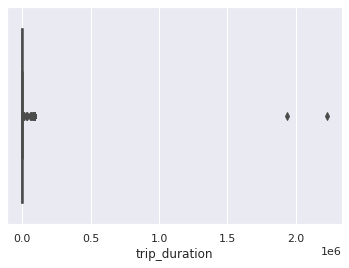

In [31]:
sns.boxplot(data['trip_duration'])

In [32]:
data['trip_duration'].sort_values(ascending = False)

19563    2227612
19297    1939736
17686      86354
2578       86353
20824      86346
          ...   
7406           3
19101          3
32884          3
32995          3
32060          2
Name: trip_duration, Length: 39396, dtype: int64

In [33]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace=True)

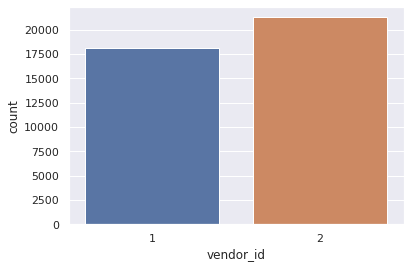

In [34]:
sns.countplot(x ='vendor_id' ,data = data)

In [35]:
data.passenger_count.value_counts()

1    27494
2     5803
5     2202
3     1654
6     1310
4      926
0        5
8        1
Name: passenger_count, dtype: int64

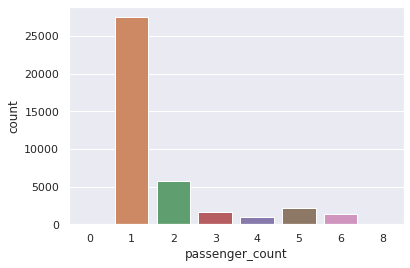

In [36]:
sns.countplot(x = 'passenger_count', data = data)

In [37]:
data = data[data['passenger_count']!= 0]
data = data[data['passenger_count']<= 6]

In [38]:
data['store_and_fwd_flag'].value_counts(normalize = True)

N    0.994161
Y    0.005839
Name: store_and_fwd_flag, dtype: float64

# Distancia

In [39]:
data['distance'].value_counts()

0.000000    157
0.000424      2
0.000425      2
0.002122      2
0.873825      1
           ... 
2.769188      1
2.099296      1
0.545191      1
0.911024      1
2.559491      1
Name: distance, Length: 39230, dtype: int64

# Viajes por día

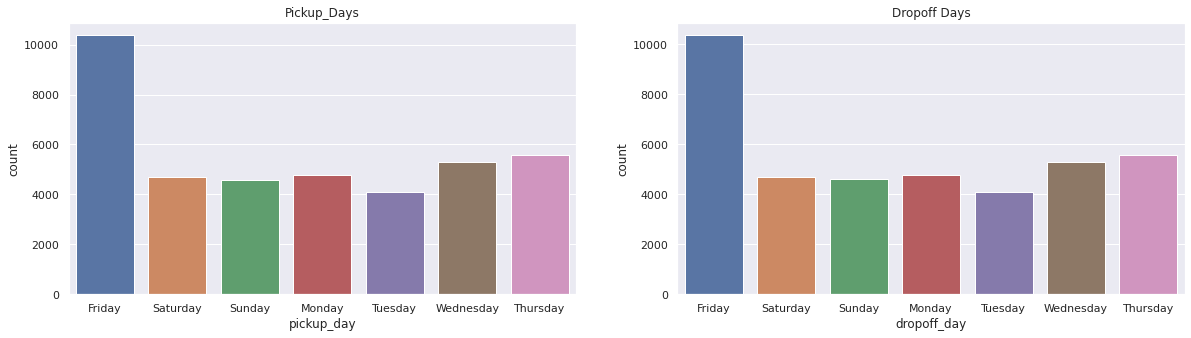

In [40]:
figure , (ax1,ax2) = plt.subplots(ncols = 2, figsize = (20,5))
ax1.set_title('Pickup_Days')
ax = sns.countplot(x = 'pickup_day', data = data, ax = ax1)

ax2.set_title('Dropoff Days')
ax = sns.countplot(x ='dropoff_day', data = data, ax =ax2)

# Viajes por hora


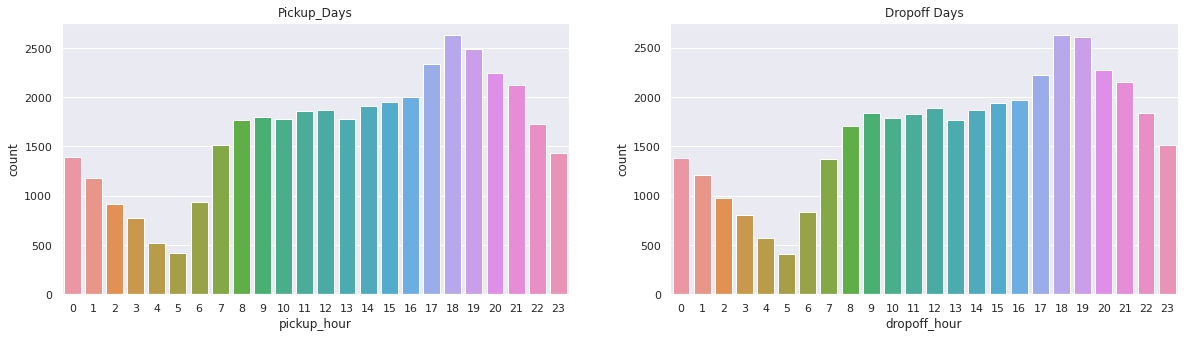

In [41]:
figure, (ax9,ax10) = plt.subplots(ncols = 2, figsize= (20,5))
ax9.set_title('Pickup_Days')
ax= sns.countplot(x ='pickup_hour', data = data, ax = ax9)

ax10.set_title('Dropoff Days')
ax = sns.countplot(x ='dropoff_hour', data = data, ax = ax10)

# Viajes por hora del día

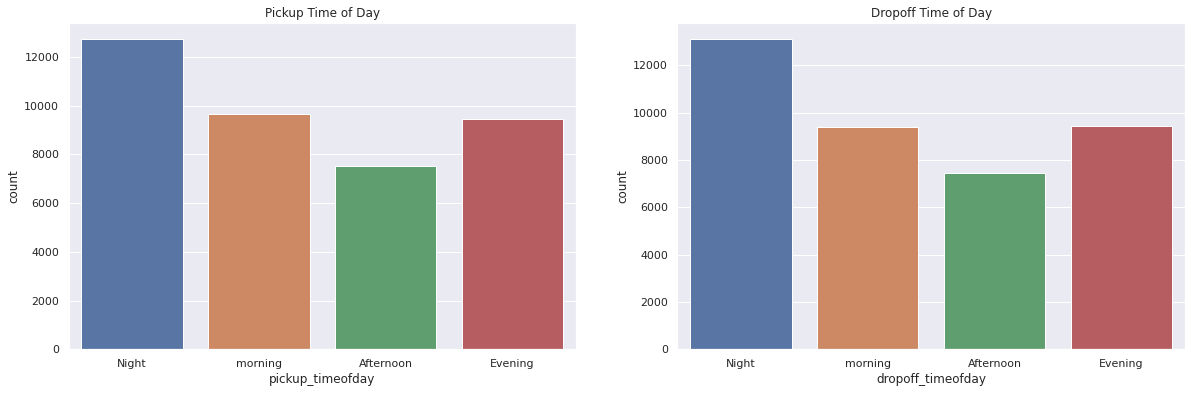

In [42]:
figure ,(ax3,ax4) = plt.subplots(ncols = 2, figsize=(20,6))
ax3.set_title('Pickup Time of Day')
ax = sns.countplot(x ='pickup_timeofday', data=data,ax = ax3)

ax4.set_title('Dropoff Time of Day')
ax = sns.countplot(x = 'dropoff_timeofday', data = data, ax=ax4)

#  Viajes por mes

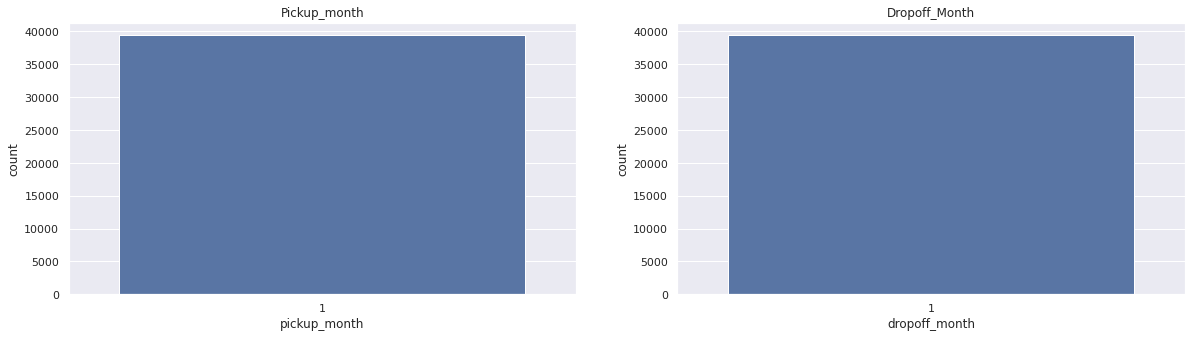

In [43]:
figure,(ax11,ax12) = plt.subplots(ncols = 2, figsize=(20,5))
ax11.set_title('Pickup_month')
ax = sns.countplot(x ='pickup_month', data = data, ax=ax11)
ax12.set_title('Dropoff_Month')
ax = sns.countplot(x ='dropoff_month', data = data, ax = ax12)

# Duración de viajes por operador

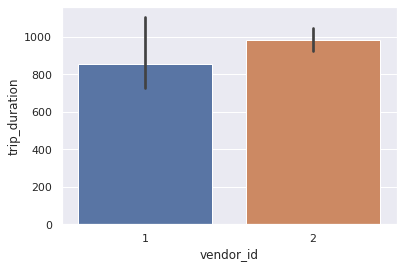

In [44]:
sns.barplot(y = 'trip_duration', x = 'vendor_id', data = data,
            estimator = np.mean)

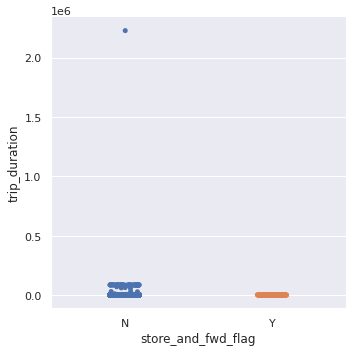

In [45]:
sns.catplot( y = 'trip_duration',x = 'store_and_fwd_flag', data = data, kind ='strip')

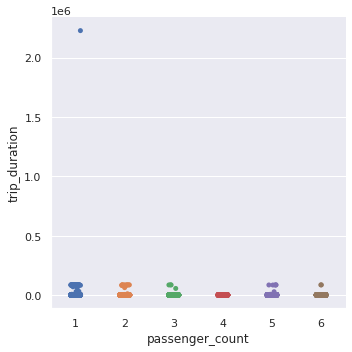

In [46]:
sns.catplot(y = 'trip_duration', x ='passenger_count', data = data , kind = 'strip')

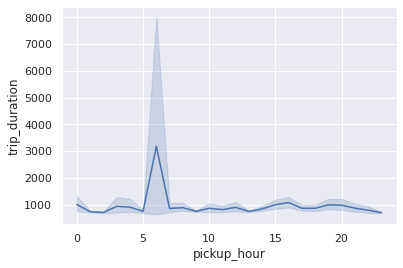

In [47]:
sns.lineplot(x = 'pickup_hour', y = 'trip_duration', data = data)

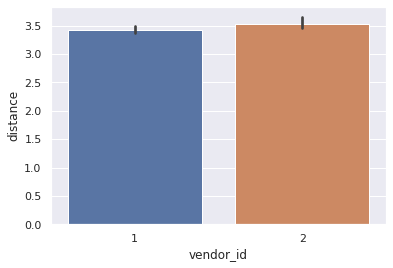

In [48]:
sns.barplot(y = 'distance', x  ='vendor_id', data = data, estimator = np.mean)

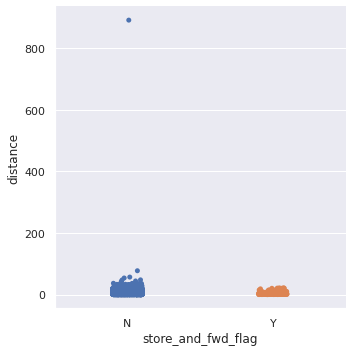

In [49]:
sns.catplot(y = 'distance', x='store_and_fwd_flag', data = data, kind='strip')

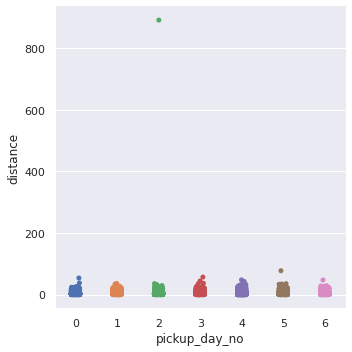

In [50]:
sns.catplot(x ='pickup_day_no', y='distance', data = data)

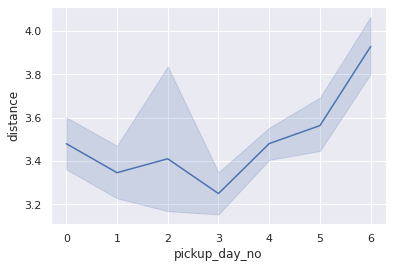

In [51]:
sns.lineplot(x ='pickup_day_no', y='distance', data = data)

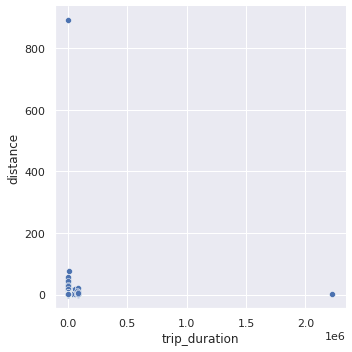

In [52]:
sns.relplot(y = data.distance, x= 'trip_duration', data = data)

In [53]:
data[data.distance==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,droff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
159,id0442648,2,2016-01-01 00:30:00,2016-01-01 00:58:00,1,-73.946167,40.750908,-73.946167,40.750908,N,...,Friday,4,4,0,0,1,1,Night,Night,0.0
371,id3434741,1,2016-01-01 00:58:00,2016-01-01 00:58:00,1,-74.316406,40.529366,-74.316406,40.529366,N,...,Friday,4,4,0,0,1,1,Night,Night,0.0
504,id2018035,1,2016-01-01 01:17:00,2016-01-01 01:18:00,3,-74.003632,40.784061,-74.003632,40.784061,N,...,Friday,4,4,1,1,1,1,Night,Night,0.0
586,id0230631,2,2016-01-01 01:30:00,2016-01-01 02:05:00,1,-73.916946,40.837261,-73.916946,40.837261,N,...,Friday,4,4,1,2,1,1,Night,Night,0.0
632,id0844498,2,2016-01-01 01:36:00,2016-01-01 01:51:00,1,-73.989822,40.735302,-73.989822,40.735302,N,...,Friday,4,4,1,1,1,1,Night,Night,0.0


In [54]:
data[data.distance>0.5].count()

id                    38012
vendor_id             38012
pickup_datetime       38012
dropoff_datetime      38012
passenger_count       38012
pickup_longitude      38012
pickup_latitude       38012
dropoff_longitude     38012
dropoff_latitude      38012
store_and_fwd_flag    38012
gc_distance           38012
trip_duration         38012
google_distance       37472
google_duration       37472
pickup_day            38012
dropoff_day           38012
pickup_day_no         38012
droff_day_no          38012
pickup_hour           38012
dropoff_hour          38012
pickup_month          38012
dropoff_month         38012
pickup_timeofday      38012
dropoff_timeofday     38012
distance              38012
dtype: int64

In [55]:
for col in data:
    print(f"{col}:{data[col].unique()}")

id:['id0190469' 'id1665586' 'id1078247' ... 'id3324326' 'id3410388'
 'id0044708']
vendor_id:[2 1]
pickup_datetime:['2016-01-01T00:00:00.000000000' '2016-01-01T00:01:00.000000000'
 '2016-01-01T00:02:00.000000000' ... '2016-01-08T21:54:00.000000000'
 '2016-01-08T21:55:00.000000000' '2016-01-08T21:56:00.000000000']
dropoff_datetime:['2016-01-01T00:14:00.000000000' '2016-01-01T00:22:00.000000000'
 '2016-01-01T00:03:00.000000000' ... '2016-01-08T22:04:00.000000000'
 '2016-01-08T22:12:00.000000000' '2016-01-08T22:14:00.000000000']
passenger_count:[5 1 2 3 4 6]
pickup_longitude:[-73.98174286 -73.98508453 -73.97333527 ... -73.99565125 -74.02311707
 -73.95082092]
pickup_latitude:[40.71915817 40.74716568 40.76407242 ... 40.75350189 40.73135757
 40.7230835 ]
dropoff_longitude:[-73.93882751 -73.95803833 -73.97485352 ... -74.0306015  -73.93953705
 -73.94979095]
dropoff_latitude:[40.82918167 40.71749115 40.76173401 ... 40.75825882 40.73993301
 40.72644424]
store_and_fwd_flag:['N' 'Y']
gc_distance:[7

# Predicción de la distancia de viajes por día

In [56]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
gc_distance                  float64
trip_duration                  int64
google_distance              float64
google_duration              float64
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int64
droff_day_no                   int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
pickup_timeofday              object
dropoff_timeofday             object
distance                     float64
dtype: object

In [57]:
data = data[['vendor_id','passenger_count','pickup_latitude','dropoff_latitude','trip_duration','pickup_day','dropoff_day','distance']]

In [58]:
data.sample(2)

,vendor_id,passenger_count,pickup_latitude,dropoff_latitude,trip_duration,pickup_day,dropoff_day,distance
6346,1,1,40.754681,40.756603,301,Saturday,Saturday,0.681524
19912,2,1,40.775059,40.764606,346,Tuesday,Tuesday,1.658733


In [59]:
data.replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7},inplace=True)

In [60]:
data.sample(2)

,vendor_id,passenger_count,pickup_latitude,dropoff_latitude,trip_duration,pickup_day,dropoff_day,distance
14790,1,1,40.730709,40.709000,307,1,1,2.461679
22172,1,1,40.752914,40.794624,1406,2,2,6.643088


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = data.drop(['pickup_day','dropoff_day','distance'],axis='columns')
y = data[['pickup_day','dropoff_day','distance']]

In [63]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [64]:
X_train[:4]

,vendor_id,passenger_count,pickup_latitude,dropoff_latitude,trip_duration
9245,1,4,40.744553,40.618622,2501
18381,1,1,40.752098,40.746296,198
22800,1,1,40.645512,40.746887,1844
6009,2,2,40.787540,40.766529,417


In [65]:
len(X_train.columns)

5

In [66]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [67]:
model = keras.Sequential([
    keras.layers.Dense(5, input_shape=(5,), activation='relu'),
    keras.layers.Dense(20,  activation='relu'),
    keras.layers.Dense(15,  activation='relu'),
    keras.layers.Dense(3,  activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train,y_train, epochs=100)

Epoch 1/100
985/985 [==============================] - 3s 2ms/step - loss: -4312351.0000 - accuracy: 0.0038
Epoch 2/100
985/985 [==============================] - 2s 2ms/step - loss: -37679368.0000 - accuracy: 0.2833
Epoch 3/100
985/985 [==============================] - 2s 2ms/step - loss: -143355440.0000 - accuracy: 0.3041
Epoch 4/100
985/985 [==============================] - 2s 2ms/step - loss: -406237120.0000 - accuracy: 0.3041
Epoch 5/100
985/985 [==============================] - 2s 2ms/step - loss: -872130112.0000 - accuracy: 0.3041
Epoch 6/100
985/985 [==============================] - 2s 2ms/step - loss: -1703653120.0000 - accuracy: 0.3041
Epoch 7/100
985/985 [==============================] - 2s 2ms/step - loss: -2969939712.0000 - accuracy: 0.3041
Epoch 8/100
985/985 [==============================] - 2s 2ms/step - loss: -4618375168.0000 - accuracy: 0.3041
Epoch 9/100
985/985 [==============================] - 2s 2ms/step - loss: -6708564992.0000 - accuracy: 0.3041
Epoch 10/

In [68]:
model.evaluate(X_test,y_test)

247/247 [==============================] - 1s 2ms/step - loss: -34567368998912.0000 - accuracy: 0.3064


[-34567368998912.0, 0.3064229488372803]

# Se obtiene un 30% de predicción con el cual no se puede llegar a un plan de acción o toma de decisiones certero.

In [69]:
model = keras.Sequential([
    keras.layers.Dense(5, input_shape=(5,), activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(20,  activation='relu'),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(15,  activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(3,  activation='sigmoid'),
])

model.compile(optimizer='Adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train,y_train, epochs=10)

Epoch 1/10
985/985 [==============================] - 2s 2ms/step - loss: 156.1379 - accuracy: 0.1966
Epoch 2/10
985/985 [==============================] - 2s 2ms/step - loss: 92.0384 - accuracy: 0.1805
Epoch 3/10
985/985 [==============================] - 2s 2ms/step - loss: 20.7179 - accuracy: 0.1805
Epoch 4/10
985/985 [==============================] - 2s 2ms/step - loss: 5.5498 - accuracy: 0.1834
Epoch 5/10
985/985 [==============================] - 2s 2ms/step - loss: -39.5700 - accuracy: 0.1894
Epoch 6/10
985/985 [==============================] - 2s 2ms/step - loss: -66.9904 - accuracy: 0.1988
Epoch 7/10
985/985 [==============================] - 2s 2ms/step - loss: -152.6472 - accuracy: 0.2054
Epoch 8/10
985/985 [==============================] - 2s 2ms/step - loss: -101.5485 - accuracy: 0.2083
Epoch 9/10
985/985 [==============================] - 2s 2ms/step - loss: -161.3553 - accuracy: 0.2101
Epoch 10/10
985/985 [==============================] - 2s 2ms/step - loss: -181.789

In [71]:
model.evaluate(X_test,y_test)

247/247 [==============================] - 0s 2ms/step - loss: -139.7941 - accuracy: 0.3078


[-139.7941436767578, 0.3078192472457886]

# 30% / 69%